# NOTE ENTRIES DISTRIBUTION AND PATIENT SELECTION

## DESCRIPTION
In this notebook, the graphics A and B inserted in Figure 2 of the paper are obtained. Figure 2 is dedicated to the distribution of medical entries for breast patient population, patient selection and completeness of MEDomics features used for statistical learning.

* A) Distribution of number of days per month with at least 1 medical entry for breast cancer patients for a time period of 6 months prior to initial diagnosis until 24 months past diagnosis. The box plots indicate the median, first/third quartiles and the minimum and maximum values over the entire breast patient population.

* B) Left - Distribution of the breast patient total number of days with medical entries for the time period in A as a function of the computed temporal continuity score of medical entries. Right- Close-up on a subset of the data represented on the left. 


## STATEMENT
 This file is part of <https://github.com/medomics>, a package providing 
 research utility tools for developing precision medicine applications.
 
 --> Copyright (C) 2020  MEDomics consortium

     This package is free software: you can redistribute it and/or modify
     it under the terms of the GNU General Public License as published by
     the Free Software Foundation, either version 3 of the License, or
     (at your option) any later version.

     This package is distributed in the hope that it will be useful,
     but WITHOUT ANY WARRANTY; without even the implied warranty of
     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
     GNU General Public License for more details.
 
     You should have received a copy of the GNU General Public License
     along with this package.  If not, see <http://www.gnu.org/licenses/>.

## IMPORTS

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

## PLOT RESULTS

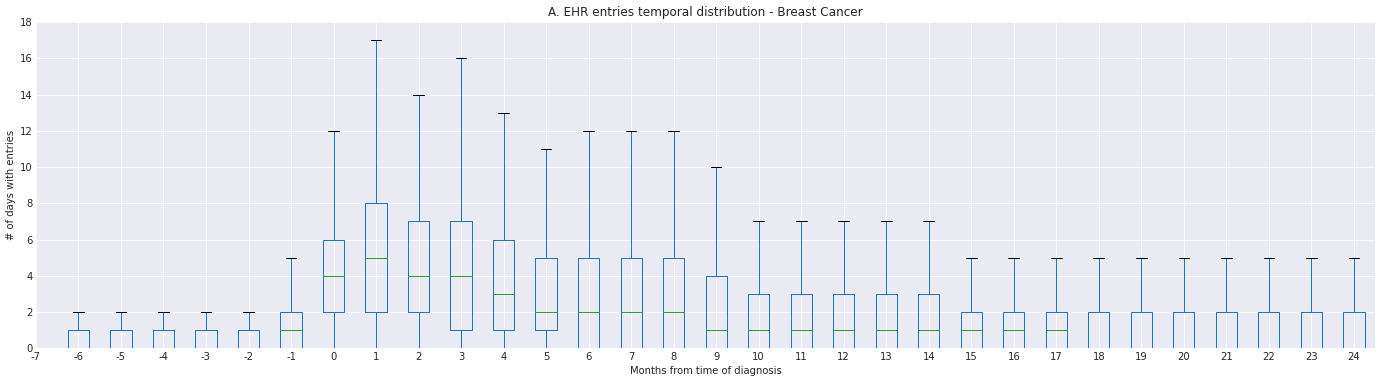

In [2]:
# A) Distribution of number of days per month with at least 1 medical entry for breast cancer patients
# for a time period of 6 months prior to initial diagnosis until 24 months past diagnosis. The box plots
# indicate the median, first/third quartiles and the minimum and maximum values over the entire breast 
# patient population.

plt.style.use('seaborn-darkgrid')
df = pd.read_csv('./Data/Fig2_A.csv', sep=',', encoding='iso-8859-1')
df.T.plot.box(figsize=(24,6),ylim=[0,18], xlim=[0,31+0.5],showfliers=False)
plt.grid(True)
plt.xticks(np.arange(0,32),np.arange(-7,25))

plt.xlabel('Months from time of diagnosis')
plt.ylabel('# of days with entries')
plt.title('A. EHR entries temporal distribution - Breast Cancer')
os.makedirs('eps', 0o777, True)
plt.savefig('./eps/Fig2_A.eps', format='eps')
mpl.rcParams.update(mpl.rcParamsDefault)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

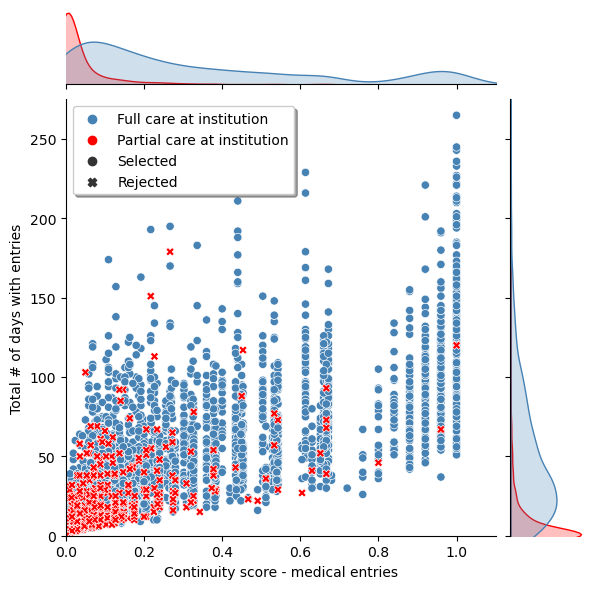

In [3]:
# B) Left - Distribution of the breast patient total number of days with medical entries for the time period in
# A as a function of the computed temporal continuity score of medical entries. 

df_all = pd.read_csv('./Data/Fig2_B.csv', sep=',', encoding='iso-8859-1')
df_all = df_all.sort_values(by='institution', ascending=False, na_position='first')
df_all.reset_index(inplace=True,drop=True)
df_all['treated at the institution'] = "Full care at institution"
df_all['treated at the institution'] = np.where(df_all['institution']==True,
                                                "Full care at institution",
                                                "Partial care at institution")


cat_type = CategoricalDtype(categories=["Full care at institution", "Partial care at institution"], ordered=True)
df_all['treated at the institution'] = df_all['treated at the institution'].astype(cat_type)
df_all['method'] = 'Selected'
df_all['method'] =np.where((df_all['institution']==False),
                            "Rejected", df_all['method'])

cat_type_method = CategoricalDtype(categories=["Selected", "Rejected"], ordered=True)
df_all['method'] =df_all['method'].astype(cat_type_method)

g = sns.jointplot(x=df_all['continuity_score'],
                  y=df_all['total'],
                  hue=df_all['treated at the institution'],
                  palette={"Full care at institution":'steelblue',
                           "Partial care at institution":'red'},
                  style=df_all['method'],
                  kind='scatter',
                  hue_order=["Full care at institution","Partial care at institution"])

g.ax_joint.set_xlim(0,1.1)
g.ax_joint.set_ylim(0,275)
g.ax_joint.set_ylabel('Total # of days with entries')
g.ax_joint.set_xlabel('Continuity score - medical entries')
g.ax_joint.legend_.set_title(None)
h,l = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(h[1:3]+h[4:],l[1:3]+l[4:], shadow=True)
os.makedirs('eps', 0o777, True)
g.savefig('./eps/Fig2_B_Left.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


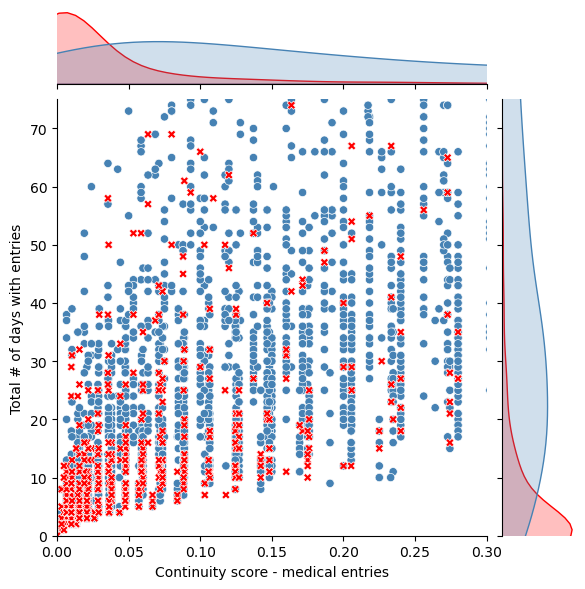

In [4]:
# B) Right- Close-up on a subset of the data represented on the left. 

df_all = pd.read_csv('./Data/Fig2_B.csv', sep=',', encoding='iso-8859-1')
df_all = df_all.sort_values(by='institution', ascending=False, na_position='first')
df_all.reset_index(inplace=True,drop=True)
df_all['treated at the institution'] = "Full care at institution"
df_all['treated at the institution'] = np.where(df_all['institution']==True,
                                                "Full care at institution",
                                                "Partial care at institution")

cat_type = CategoricalDtype(categories=["Full care at institution", "Partial care at institution"], ordered=True)
df_all['treated at the institution'] = df_all['treated at the institution'].astype(cat_type)
df_all['method'] = 'Selected'
df_all['method'] =np.where((df_all['institution']==False),
                            "Rejected", df_all['method'])

cat_type_method = CategoricalDtype(categories=["Selected", "Rejected"], ordered=True)
df_all['method'] =df_all['method'].astype(cat_type_method)
g = sns.jointplot(x=df_all['continuity_score'],
                  y=df_all['total'],
                  hue=df_all['treated at the institution'],
                  palette={"Full care at institution":'steelblue',
                           "Partial care at institution":'red'},
                  style=df_all['method'],
                  kind='scatter',
                  hue_order=["Full care at institution","Partial care at institution"])

g.ax_joint.set_xlim(0,0.3)
g.ax_joint.set_ylim(0,75)
g.ax_joint.set_ylabel('Total # of days with entries')
g.ax_joint.set_xlabel('Continuity score - medical entries')
g.ax_joint.legend_.set_title(None)
g.ax_joint.get_legend().set_visible(False)
os.makedirs('eps', 0o777, True)
g.savefig('./eps/Fig2_B_Right.eps', format='eps')
